##Mounting

In [0]:
storage_account_name = "shaqran39"
storage_account_access_key = "yQTb+AMZogT9ie2qeFSUIyKtrt/iPg7ZRPOiNFvwdboubyr4+cyf2uem9q57uUMO1x7W8O3MNPDR+AStfpVP4g=="
blob_container_name = "bde-assignment2"

dbutils.fs.mount(
  source = f'wasbs://{blob_container_name}@{storage_account_name}.blob.core.windows.net',
  mount_point = f'/mnt/{blob_container_name}/',
  extra_configs = {'fs.azure.account.key.' + storage_account_name + '.blob.core.windows.net': storage_account_access_key}
)


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-914983880225254>:5
      2 storage_account_access_key = "yQTb+AMZogT9ie2qeFSUIyKtrt/iPg7ZRPOiNFvwdboubyr4+cyf2uem9q57uUMO1x7W8O3MNPDR+AStfpVP4g=="
      3 blob_container_name = "bde-assignment2"
----> 5 dbutils.fs.mount(
      6   source = f'wasbs://{blob_container_name}@{storage_account_name}.blob.core.windows.net',
      7   mount_point = f'/mnt/{blob_container_name}/',
      8   extra_configs = {'fs.azure.account.key.' + storage_account_name + '.blob.core.windows.net': storage_account_access_key}
      9 )

File /databricks/python_shell/dbruntime/dbutils.py:362, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    360 exc.__context__ = None
    361 exc.__cause__ = None
--> 362 raise exc

ExecutionError: An error occurred while calling o552.mount.
: java.rmi.RemoteExcept

In [0]:
dbutils.fs.ls("/mnt/bde-assignment2/")

Out[9]: [FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2015.parquet', name='green_taxi_2015.parquet', size=404556105, modificationTime=1727155815000),
 FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2016.parquet', name='green_taxi_2016.parquet', size=346731598, modificationTime=1727155983000),
 FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2017.parquet', name='green_taxi_2017.parquet', size=251504885, modificationTime=1727156110000),
 FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2018.parquet', name='green_taxi_2018.parquet', size=193874396, modificationTime=1727156726000),
 FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2019.parquet', name='green_taxi_2019.parquet', size=142163406, modificationTime=1727156707000),
 FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2020.parquet', name='green_taxi_2020.parquet', size=37076741, modificationTime=1727155492000),
 FileInfo(path='dbfs:/mnt/bde-assignment2/green_taxi_2021.parquet', name='green_taxi_2021.parquet',

#Reading data

In [0]:
# DataFrame for files starting with 'green_taxi'
green_taxi_df = spark.read.parquet("/mnt/bde-assignment2/green_taxi*.parquet")

# DataFrame for files starting with 'yellow_taxi'
yellow_taxi_df = spark.read.parquet("/mnt/bde-assignment2/yellow_taxi*.parquet")

# DataFrame for 'taxi_zone_lookup.csv'
taxi_zone_lookup_df = spark.read.csv("/mnt/bde-assignment2/taxi_zone_lookup.csv", header=True, inferSchema=True)


In [0]:
# Show first 5 rows of the green_taxi DataFrame
display(green_taxi_df.limit(5))




VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2015-05-01T00:24:18.000+0000,2015-05-01T00:24:39.000+0000,N,1.0,146,146,1.0,0.0,2.5,0.5,0.5,0.0,0.0,null,0.3,3.8,2.0,1.0,null
2,2015-05-01T00:28:15.000+0000,2015-05-01T00:29:00.000+0000,N,1.0,146,146,1.0,0.0,2.5,0.5,0.5,0.0,0.0,null,0.3,3.8,2.0,1.0,null
2,2015-05-01T00:07:45.000+0000,2015-05-01T00:12:50.000+0000,N,1.0,255,112,1.0,1.09,5.5,0.5,0.5,1.0,0.0,null,0.3,7.8,1.0,1.0,null
2,2015-05-01T00:26:23.000+0000,2015-05-01T00:55:12.000+0000,N,1.0,255,13,1.0,5.73,22.0,0.5,0.5,4.66,0.0,null,0.3,27.96,1.0,1.0,null
2,2015-05-01T00:20:16.000+0000,2015-05-01T00:30:37.000+0000,N,1.0,80,225,1.0,2.35,9.5,0.5,0.5,0.0,0.0,null,0.3,10.8,2.0,1.0,null


In [0]:
# Show first 5 rows of the yellow_taxi DataFrame
display(yellow_taxi_df.limit(5))



VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1,2015-01-01T00:11:33.000+0000,2015-01-01T00:16:48.000+0000,1.0,1.0,1.0,N,41,166,1,5.7,0.5,0.5,1.4,0.0,0.0,8.4,null,null
1,2015-01-01T00:18:24.000+0000,2015-01-01T00:24:20.000+0000,1.0,0.9,1.0,N,166,238,3,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,null
1,2015-01-01T00:26:19.000+0000,2015-01-01T00:41:06.000+0000,1.0,3.5,1.0,N,238,162,1,13.2,0.5,0.5,2.9,0.0,0.0,17.4,null,null
1,2015-01-01T00:45:26.000+0000,2015-01-01T00:53:20.000+0000,1.0,2.1,1.0,N,162,263,1,8.2,0.5,0.5,2.37,0.0,0.0,11.87,null,null
1,2015-01-01T00:59:21.000+0000,2015-01-01T01:05:24.000+0000,1.0,1.0,1.0,N,236,141,3,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,null


In [0]:
# Show first 5 rows of the taxi_zone_lookup DataFrame
display(taxi_zone_lookup_df.limit(5))

LocationID,Borough,Zone,service_zone
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


#Number of records in the datasets

In [0]:
print((green_taxi_df.count(), len(green_taxi_df.columns)))

(66200401, 20)


In [0]:
print((yellow_taxi_df.count(), len(yellow_taxi_df.columns)))

(663055251, 19)


#Looking up the file directory and copying files to DBFS

In [0]:
dbutils.fs.mkdirs("/FileStore/Assignment2")

Out[16]: True

In [0]:
# List all files in the root of the mounted Azure container
files = dbutils.fs.ls("/mnt/bde-assignment2/")
for f in files:
    print(f.name)


green_taxi_2015.parquet
green_taxi_2016.parquet
green_taxi_2017.parquet
green_taxi_2018.parquet
green_taxi_2019.parquet
green_taxi_2020.parquet
green_taxi_2021.parquet
green_taxi_2022.parquet
taxi_zone_lookup.csv
yellow_taxi_2015.parquet
yellow_taxi_2016.parquet
yellow_taxi_2017.parquet
yellow_taxi_2018.parquet
yellow_taxi_2019.parquet
yellow_taxi_2020.parquet
yellow_taxi_2021.parquet
yellow_taxi_2022.parquet


#Reading from Azure and copying them to DBFS

In [0]:
# Dynamically copy all files that start with 'green_taxi'
files = dbutils.fs.ls("/mnt/bde-assignment2/")
for f in files:
    if f.name.startswith("green_taxi"):
        dbutils.fs.cp(f"/mnt/bde-assignment2/{f.name}", f"/dbfs/FileStore/Assignment2/{f.name}")

# Dynamically copy all files that start with 'yellow_taxi'
for f in files:
    if f.name.startswith("yellow_taxi"):
        dbutils.fs.cp(f"/mnt/bde-assignment2/{f.name}", f"/dbfs/FileStore/Assignment2/{f.name}")


In [0]:
# Copy CSV file from Azure Blob to DBFS
dbutils.fs.cp("/mnt/bde-assignment2/taxi_zone_lookup.csv", "/dbfs/FileStore/Assignment2/taxi_zone_lookup.csv")

Out[19]: True

In [0]:
# List all files in the DBFS directory
dbutils.fs.ls("/dbfs/FileStore/Assignment2/")


Out[20]: [FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2015.parquet', name='green_taxi_2015.parquet', size=404556105, modificationTime=1727507503000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2015_csv/', name='green_taxi_2015_csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2016.parquet', name='green_taxi_2016.parquet', size=346731598, modificationTime=1727507570000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2017.parquet', name='green_taxi_2017.parquet', size=251504885, modificationTime=1727507619000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2018.parquet', name='green_taxi_2018.parquet', size=193874396, modificationTime=1727507655000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2019.parquet', name='green_taxi_2019.parquet', size=142163406, modificationTime=1727507683000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2020.parquet', name='

#Reading datasets from DBFS

In [0]:
# Reading Parquet files from DBFS (filtering by name)
green_taxi_df = spark.read.parquet("/dbfs/FileStore/Assignment2/green_taxi*.parquet")
yellow_taxi_df = spark.read.parquet("/dbfs/FileStore/Assignment2/yellow_taxi*.parquet")

# Reading the CSV file from DBFS
taxi_zone_lookup_df = spark.read.csv("/dbfs/FileStore/Assignment2/taxi_zone_lookup.csv", header=True, inferSchema=True)


In [0]:
display(green_taxi_df.limit(5))


VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2015-05-01T00:24:18.000+0000,2015-05-01T00:24:39.000+0000,N,1.0,146,146,1.0,0.0,2.5,0.5,0.5,0.0,0.0,null,0.3,3.8,2.0,1.0,null
2,2015-05-01T00:28:15.000+0000,2015-05-01T00:29:00.000+0000,N,1.0,146,146,1.0,0.0,2.5,0.5,0.5,0.0,0.0,null,0.3,3.8,2.0,1.0,null
2,2015-05-01T00:07:45.000+0000,2015-05-01T00:12:50.000+0000,N,1.0,255,112,1.0,1.09,5.5,0.5,0.5,1.0,0.0,null,0.3,7.8,1.0,1.0,null
2,2015-05-01T00:26:23.000+0000,2015-05-01T00:55:12.000+0000,N,1.0,255,13,1.0,5.73,22.0,0.5,0.5,4.66,0.0,null,0.3,27.96,1.0,1.0,null
2,2015-05-01T00:20:16.000+0000,2015-05-01T00:30:37.000+0000,N,1.0,80,225,1.0,2.35,9.5,0.5,0.5,0.0,0.0,null,0.3,10.8,2.0,1.0,null


In [0]:
display(yellow_taxi_df.limit(5))


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1,2015-01-01T00:11:33.000+0000,2015-01-01T00:16:48.000+0000,1.0,1.0,1.0,N,41,166,1,5.7,0.5,0.5,1.4,0.0,0.0,8.4,null,null
1,2015-01-01T00:18:24.000+0000,2015-01-01T00:24:20.000+0000,1.0,0.9,1.0,N,166,238,3,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,null
1,2015-01-01T00:26:19.000+0000,2015-01-01T00:41:06.000+0000,1.0,3.5,1.0,N,238,162,1,13.2,0.5,0.5,2.9,0.0,0.0,17.4,null,null
1,2015-01-01T00:45:26.000+0000,2015-01-01T00:53:20.000+0000,1.0,2.1,1.0,N,162,263,1,8.2,0.5,0.5,2.37,0.0,0.0,11.87,null,null
1,2015-01-01T00:59:21.000+0000,2015-01-01T01:05:24.000+0000,1.0,1.0,1.0,N,236,141,3,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,null


In [0]:
display(taxi_zone_lookup_df.limit(5))

LocationID,Borough,Zone,service_zone
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


#Converting "Green_taxi_2015.parquet" to a CSV file

In [0]:
# Step 1: Read the Parquet file from DBFS
green_2015_df = spark.read.parquet("/dbfs/FileStore/Assignment2/green_taxi_2015.parquet")

# Step 2: Convert the DataFrame to CSV and save it to DBFS
green_2015_df.coalesce(1).write.option("header", "true").csv("/dbfs/FileStore/Assignment2/green_taxi_2015_csv")



---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1809771541056707>:5
      2 green_2015_df = spark.read.parquet("/dbfs/FileStore/Assignment2/green_taxi_2015.parquet")
      4 # Step 2: Convert the DataFrame to CSV and save it to DBFS
----> 5 green_2015_df.coalesce(1).write.option("header", "true").csv("/dbfs/FileStore/Assignment2/green_taxi_2015_csv")

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:1798, in DataFrameWriter.csv(self, path, mode, compression, sep, quote, escape, header, nullValue, 

In [0]:
# Step 3: List the files in the directory to get the CSV file name
dbutils.fs.ls("/dbfs/FileStore/Assignment2/green_taxi_2015_csv/")



Out[32]: [FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2015_csv/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1727337878000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2015_csv/_committed_3276124059144988895', name='_committed_3276124059144988895', size=111, modificationTime=1727337877000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2015_csv/_started_3276124059144988895', name='_started_3276124059144988895', size=0, modificationTime=1727337642000),
 FileInfo(path='dbfs:/dbfs/FileStore/Assignment2/green_taxi_2015_csv/part-00000-tid-3276124059144988895-164cba59-c975-437c-a1e1-cb171214afb2-8-1-c000.csv', name='part-00000-tid-3276124059144988895-164cba59-c975-437c-a1e1-cb171214afb2-8-1-c000.csv', size=2179116866, modificationTime=1727337858000)]

In [0]:
# Path to the newly created CSV file in DBFS
csv_file_path = "/dbfs/FileStore/Assignment2/green_taxi_2015_csv/part-00000-tid-3276124059144988895-164cba59-c975-437c-a1e1-cb171214afb2-8-1-c000.csv"

# Copy the CSV file to /FileStore/ so it can be accessed via the web browser
dbutils.fs.cp(csv_file_path, "/dbfs/FileStore/green_taxi_2015.csv")


Out[28]: True

In [0]:
download_link = "https://community.cloud.databricks.com/files/green_taxi_2015.csv"
print(f"Download your file from: {download_link}")


Download your file from: https://community.cloud.databricks.com/files/green_taxi_2015.csv


In [0]:
# List the files and display the size of the newly created CSV file
files = dbutils.fs.ls("dbfs/FileStore/Assignment2/green_taxi_2015_csv/")

for file in files:
    if file.name.endswith(".csv"):  # Only show CSV files
        print(f"File: {file.name}, Size: {file.size / (1024 * 1024):.2f} MB")


File: part-00000-tid-3276124059144988895-164cba59-c975-437c-a1e1-cb171214afb2-8-1-c000.csv, Size: 2078.17 MB


In [0]:
# List the files in the directory where the green_taxi_2015.parquet file is located
parquet_files = dbutils.fs.ls("/dbfs/FileStore/Assignment2")  # Replace with the actual path to your Parquet file

# Loop through the files and find the Parquet file
for file in parquet_files:
    if file.name == "green_taxi_2015.parquet":  # Exact name of the Parquet file
        print(f"Parquet File: {file.name}, Size: {file.size / (1024 * 1024):.2f} MB")


Parquet File: green_taxi_2015.parquet, Size: 385.81 MB


#Joining the datasets along with the location data

In [0]:
from pyspark.sql import functions as F

In [0]:
# Step 1: Rename columns in green_taxi_df to match yellow_taxi_df
green_taxi_df = green_taxi_df.withColumnRenamed("lpep_pickup_datetime", "tpep_pickup_datetime") \
                             .withColumnRenamed("lpep_dropoff_datetime", "tpep_dropoff_datetime")

# Step 2: Select common columns from both DataFrames to ensure compatibility for union
common_columns = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 
                  'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
                  'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                  'improvement_surcharge', 'total_amount', 'congestion_surcharge']

# Step 3: Add the 'Taxi_color' column for yellow_taxi_df and green_taxi_df
yellow_taxi_df_selected = yellow_taxi_df.select(*common_columns).withColumn("Taxi_color", F.lit("yellow"))
green_taxi_df_selected = green_taxi_df.select(*common_columns).withColumn("Taxi_color", F.lit("green"))

# Step 4: Union the two DataFrames
combined_taxi_df = yellow_taxi_df_selected.union(green_taxi_df_selected)




In [0]:
from pyspark.sql import functions as F

# Step 1: Alias the location_df for pickup (PU) and dropoff (DO) joins
location_df_PU = taxi_zone_lookup_df.alias("PU")
location_df_DO = taxi_zone_lookup_df.alias("DO")

# Step 2: Join the location_df_PU with the combined_taxi_df to add pickup location information
combined_taxi_df = combined_taxi_df.join(location_df_PU, combined_taxi_df.PULocationID == location_df_PU.LocationID, how='left') \
                                   .withColumn("PU_Borough", F.col("PU.Borough")) \
                                   .withColumn("PU_Zone", F.col("PU.Zone")) \
                                   .withColumn("PU_service_zone", F.col("PU.service_zone")) \
                                   .drop("PU.location_ID")

# Step 3: Join the location_df_DO with the combined_taxi_df to add dropoff location information
combined_taxi_df = combined_taxi_df.join(location_df_DO, combined_taxi_df.DOLocationID == location_df_DO.LocationID, how='left') \
                                   .withColumn("DO_Borough", F.col("DO.Borough")) \
                                   .withColumn("DO_Zone", F.col("DO.Zone")) \
                                   .withColumn("DO_service_zone", F.col("DO.service_zone")) \
                                   .drop("DO.location_ID")


In [0]:
# Drop unwanted columns that were duplicated after the join
combined_taxi_df = combined_taxi_df.drop("Borough", "Zone", "service_zone", "LocationID")



In [0]:
display(combined_taxi_df.limit(5))

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Taxi_color,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
1,2015-01-01T00:11:33.000+0000,2015-01-01T00:16:48.000+0000,1.0,1.0,1.0,N,41,166,1.0,5.7,0.5,0.5,1.4,0.0,0.0,8.4,null,yellow,Manhattan,Central Harlem,Boro Zone,Manhattan,Morningside Heights,Boro Zone
1,2015-01-01T00:18:24.000+0000,2015-01-01T00:24:20.000+0000,1.0,0.9,1.0,N,166,238,3.0,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,yellow,Manhattan,Morningside Heights,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
1,2015-01-01T00:26:19.000+0000,2015-01-01T00:41:06.000+0000,1.0,3.5,1.0,N,238,162,1.0,13.2,0.5,0.5,2.9,0.0,0.0,17.4,null,yellow,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Midtown East,Yellow Zone
1,2015-01-01T00:45:26.000+0000,2015-01-01T00:53:20.000+0000,1.0,2.1,1.0,N,162,263,1.0,8.2,0.5,0.5,2.37,0.0,0.0,11.87,null,yellow,Manhattan,Midtown East,Yellow Zone,Manhattan,Yorkville West,Yellow Zone
1,2015-01-01T00:59:21.000+0000,2015-01-01T01:05:24.000+0000,1.0,1.0,1.0,N,236,141,3.0,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,yellow,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone


In [0]:
# Show the resulting DataFrame with the duplicate columns removed
display(combined_taxi_df.limit(5))

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Taxi_color,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
1,2015-01-01T00:11:33.000+0000,2015-01-01T00:16:48.000+0000,1.0,1.0,1.0,N,41,166,1.0,5.7,0.5,0.5,1.4,0.0,0.0,8.4,null,yellow,Manhattan,Central Harlem,Boro Zone,Manhattan,Morningside Heights,Boro Zone
1,2015-01-01T00:18:24.000+0000,2015-01-01T00:24:20.000+0000,1.0,0.9,1.0,N,166,238,3.0,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,yellow,Manhattan,Morningside Heights,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
1,2015-01-01T00:26:19.000+0000,2015-01-01T00:41:06.000+0000,1.0,3.5,1.0,N,238,162,1.0,13.2,0.5,0.5,2.9,0.0,0.0,17.4,null,yellow,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Midtown East,Yellow Zone
1,2015-01-01T00:45:26.000+0000,2015-01-01T00:53:20.000+0000,1.0,2.1,1.0,N,162,263,1.0,8.2,0.5,0.5,2.37,0.0,0.0,11.87,null,yellow,Manhattan,Midtown East,Yellow Zone,Manhattan,Yorkville West,Yellow Zone
1,2015-01-01T00:59:21.000+0000,2015-01-01T01:05:24.000+0000,1.0,1.0,1.0,N,236,141,3.0,6.0,0.5,0.5,0.0,0.0,0.0,7.3,null,yellow,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone


In [0]:
# Filter the taxi_zone_lookup_df to get the records where location_ID is 41 or 166
taxi_zone_lookup_df.filter((F.col("LocationID") == 41) | (F.col("LocationID") == 166)).show(truncate=False)


+----------+---------+-------------------+------------+
|LocationID|Borough  |Zone               |service_zone|
+----------+---------+-------------------+------------+
|41        |Manhattan|Central Harlem     |Boro Zone   |
|166       |Manhattan|Morningside Heights|Boro Zone   |
+----------+---------+-------------------+------------+



In [0]:
num_rows = combined_taxi_df.count()

# Get the number of columns
num_columns = len(combined_taxi_df.columns)

# Show the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 729255652
Number of columns: 25


#Exporting the combined data into a parquet file in DBFS

In [0]:
combined_taxi_df.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data.parquet")



java.io.IOException: Connection failed
	at com.databricks.rpc.Jetty9Client$$anon$1.handleError(Jetty9Client.scala:845)
	at com.databricks.rpc.Jetty9Client$$anon$1.onFailure(Jetty9Client.scala:772)
	at shaded.v9_4.org.eclipse.jetty.client.ResponseNotifier.notifyFailure(ResponseNotifier.java:197)
	at shaded.v9_4.org.eclipse.jetty.client.ResponseNotifier.notifyFailure(ResponseNotifier.java:189)
	at shaded.v9_4.org.eclipse.jetty.client.HttpExchange.notifyFailureComplete(HttpExchange.java:275)
	at shaded.v9_4.org.eclipse.jetty.client.HttpExchange.abort(HttpExchange.java:247)
	at shaded.v9_4.org.eclipse.jetty.client.HttpConversation.abort(HttpConversation.java:164)
	at shaded.v9_4.org.eclipse.jetty.client.HttpRequest.abort(HttpRequest.java:821)
	at shaded.v9_4.org.eclipse.jetty.client.HttpDestination.abort(HttpDestination.java:559)
	at shaded.v9_4.org.eclipse.jetty.client.HttpDestination.failed(HttpDestination.java:313)
	at com.databricks.rpc.AbstractConnectionPool$1.failed(AbstractConnectionPool.java:161)
	at shaded.v9_4.org.eclipse.jetty.util.Promise$Wrapper.failed(Promise.java:136)
	at com.databricks.rpc.Jetty9Client$DatabricksHttpDestinationOverHTTP$$anon$2.failed(Jetty9Client.scala:1691)
	at shaded.v9_4.org.eclipse.jetty.util.Promise$Wrapper.failed(Promise.java:136)
	at shaded.v9_4.org.eclipse.jetty.client.HttpClient$1$1.failed(HttpClient.java:660)
	at shaded.v9_4.org.eclipse.jetty.client.AbstractConnectorHttpClientTransport.connectFailed(AbstractConnectorHttpClientTransport.java:138)
	at shaded.v9_4.org.eclipse.jetty.client.AbstractConnectorHttpClientTransport$ClientSelectorManager.connectionFailed(AbstractConnectorHttpClientTransport.java:188)
	at shaded.v9_4.org.eclipse.jetty.io.ManagedSelector$Connect.failed(ManagedSelector.java:966)
	at shaded.v9_4.org.eclipse.jetty.io.ManagedSelector.processConnect(ManagedSelector.java:369)
	at shaded.v9_4.org.eclipse.jetty.io.ManagedSelector.access$1700(ManagedSelector.java:65)
	at shaded.v9_4.org.eclipse.jetty.io.ManagedSelector$SelectorProducer.processSelected(ManagedSelector.java:676)
	at shaded.v9_4.org.eclipse.jetty.io.ManagedSelector$SelectorProducer.produce(ManagedSelector.java:535)
	at shaded.v9_4.org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.produceTask(EatWhatYouKill.java:362)
	at shaded.v9_4.org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.doProduce(EatWhatYouKill.java:186)
	at shaded.v9_4.org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.tryProduce(EatWhatYouKill.java:173)
	at shaded.v9_4.org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.run(EatWhatYouKill.java:131)
	at shaded.v9_4.org.eclipse.jetty.util.thread.ReservedThreadExecutor$ReservedThread.run(ReservedThreadExecutor.java:409)
	at com.databricks.rpc.ShadedInstrumentedQueuedThreadPool$$anon$2.$anonfun$run$4(InstrumentedQueuedThreadPool.scala:173)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:48)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:271)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:267)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:46)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:43)
	at com.databricks.rpc.ShadedInstrumentedQueuedThreadPool.withAttributionContext(InstrumentedQueuedThreadPool.scala:125)
	at com.databricks.rpc.ShadedInstrumentedQueuedThreadPool$$anon$2.$anonfun$run$3(InstrumentedQueuedThreadPool.scala:173)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.instrumentation.QueuedThreadPoolInstrumenter.trackActiveThreads(QueuedThreadPoolInstrumenter.scala:110)
	at com.databricks.instrumentation.QueuedThreadPoolInstrume

In [0]:
partition_0 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 0")
partition_0.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_0.parquet")


In [0]:
partition_1 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 1")
partition_1.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_1.parquet")


In [0]:
partition_2 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 2")
partition_2.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_2.parquet")


In [0]:
partition_3 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 3")
partition_3.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_3.parquet")


In [0]:
partition_4 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 4")
partition_4.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_4.parquet")


In [0]:
partition_5 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 5")
partition_5.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_5.parquet")


In [0]:
partition_6 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 6")
partition_6.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_6.parquet")


In [0]:
partition_7 = combined_taxi_df.repartition(8).filter(f"spark_partition_id() = 7")
partition_7.write.mode("overwrite").parquet("/dbfs/FileStore/tables/combined_taxi_data_part_7.parquet")


#Loading the combined file as a table

In [0]:
# Step 2A: Load the Parquet file as a temporary view
combined_taxi_df = spark.read.parquet("/dbfs/FileStore/tables/combined_taxi_data_part*.parquet")
combined_taxi_df.createOrReplaceTempView("combined_taxi_view")



In [0]:
# Query the view
display(combined_taxi_df.limit(5))


In [0]:
combined_taxi_df.columns

Out[20]: ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Taxi_color',
 'PU_Borough',
 'PU_Zone',
 'PU_service_zone',
 'DO_Borough',
 'DO_Zone',
 'DO_service_zone',
 'trip_duration_hours',
 'speed_mph']

In [0]:
num_rows = combined_taxi_df.count()

# Get the number of columns
num_columns = len(combined_taxi_df.columns)

# Show the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 719568021
Number of columns: 21


#cleaning final dataset

6a.Trips finishing before the starting time

In [0]:
# Step 1: Remove trips where dropoff is before pickup
combined_taxi_df = combined_taxi_df.filter(combined_taxi_df.tpep_dropoff_datetime >= combined_taxi_df.tpep_pickup_datetime)


6b.Trips where the pickup/dropoff datetime is outside of the range. 

In [0]:
from pyspark.sql.functions import year

# Filter the DataFrame to keep only rows where the pickup and dropoff dates are between 2015 and 2022
# Filter the DataFrame to keep only rows where the pickup and dropoff dates are between 2015 and 2022
combined_taxi_df = combined_taxi_df.filter(
    (year(combined_taxi_df['tpep_pickup_datetime']) >= 2015) & 
    (year(combined_taxi_df['tpep_pickup_datetime']) <= 2022) &
    (year(combined_taxi_df['tpep_dropoff_datetime']) >= 2015) & 
    (year(combined_taxi_df['tpep_dropoff_datetime']) <= 2022)
)

# Show the filtered dataset
#filtered_df.show()


In [0]:
combined_taxi_df = combined_taxi_df.withColumn(
    "trip_duration_hours", 
    (F.unix_timestamp("tpep_dropoff_datetime") - F.unix_timestamp("tpep_pickup_datetime")) / 3600
)

# Remove trips with duration more than 2 hours
combined_taxi_df = combined_taxi_df.filter(F.col("trip_duration_hours") <= 2)


6c.Trips with negative speed

In [0]:
combined_taxi_df = combined_taxi_df.withColumn(
    "speed_mph", 
    F.col("trip_distance") / F.col("trip_duration_hours")
)

In [0]:
# Step 4: Remove trips with negative or zero speed
combined_taxi_df = combined_taxi_df.filter(F.col("speed_mph") > 0)


6d. Trips with very high speed

In [0]:
max_speed = combined_taxi_df.agg(F.max("speed_mph")).collect()[0][0]

# Display the maximum speed
print(f"The highest speed in the dataset is: {max_speed} mph")

The highest speed in the dataset is: 3079127441.7391305 mph


In [0]:
combined_taxi_df = combined_taxi_df.filter(F.col("speed_mph") <= 65)

6e.Trips that are travelling too short or too long (duration wise)

In [0]:
# Step 6: Remove trips that are too short or too long (duration-wise)
# Assume trips less than 1 minute or greater than 2 hours are unrealistic
combined_taxi_df = combined_taxi_df.filter((F.col("trip_duration_hours") >= 1/60) & (F.col("trip_duration_hours") < 2))


 6f.Trips that are travelling too short or too long (distance wise)

In [0]:
# Step 8: Remove trips that are too short or too long (distance-wise)
# Assume trips less than 0.1 miles or greater than 100 miles are unrealistic
combined_taxi_df = combined_taxi_df.filter((F.col("trip_distance") >= 0.1) & (F.col("trip_distance") <= 100))


Counting the final dataset rows and columns

In [0]:
num_rows = combined_taxi_df.count()

# Get the number of columns
num_columns = len(combined_taxi_df.columns)

# Show the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 717973113
Number of columns: 27


In [0]:
# Display the schema of the dataset
combined_taxi_df.printSchema()


root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Taxi_color: string (nullable = false)
 |-- PU_Borough: string (nullable = true)
 |-- PU_Zone: string (nullable = true)
 |-- PU_service_zone: string (nullable = true)
 |-- DO_B

#Business Questions

In [0]:
from pyspark.sql import functions as F
from pyspark.sql import Window

In [0]:
combined_taxi_df.createOrReplaceTempView("combined_taxi_df")


1bq

In [0]:
%sql
-- First, calculate the total trips, day of the week, and hour of the day aggregates in a subquery
WITH trip_aggregates AS (
    SELECT 
        CONCAT(YEAR(tpep_pickup_datetime), '-', LPAD(MONTH(tpep_pickup_datetime), 2, '0')) AS year_month,
        DAYOFWEEK(tpep_pickup_datetime) AS day_of_week,
        HOUR(tpep_pickup_datetime) AS hour_of_day,
        COUNT(*) AS total_trips,
        AVG(passenger_count) AS avg_passengers,
        AVG(total_amount) AS avg_amount_per_trip,
        AVG(total_amount / passenger_count) AS avg_amount_per_passenger
    FROM combined_taxi_df
    WHERE passenger_count > 0
    GROUP BY 
        CONCAT(YEAR(tpep_pickup_datetime), '-', LPAD(MONTH(tpep_pickup_datetime), 2, '0')),
        DAYOFWEEK(tpep_pickup_datetime),
        HOUR(tpep_pickup_datetime)
)

-- Now apply window functions to rank the most frequent day of the week and hour of the day
, ranked_aggregates AS (
    SELECT 
        year_month,
        day_of_week,
        hour_of_day,
        total_trips,
        avg_passengers,
        avg_amount_per_trip,
        avg_amount_per_passenger,
        
        -- Rank for the most trips per day of the week and hour of the day
        DENSE_RANK() OVER (PARTITION BY year_month ORDER BY total_trips DESC) AS rank_day_of_week,
        DENSE_RANK() OVER (PARTITION BY year_month ORDER BY total_trips DESC) AS rank_hour_of_day

    FROM trip_aggregates
)

-- Filter on ranks to get the most frequent day of week and hour of day
SELECT 
    year_month,
    day_of_week,
    hour_of_day,
    total_trips,
    avg_passengers,
    avg_amount_per_trip,
    avg_amount_per_passenger
FROM ranked_aggregates
WHERE rank_day_of_week = 1 AND rank_hour_of_day = 1


year_month,day_of_week,hour_of_day,total_trips,avg_passengers,avg_amount_per_trip,avg_amount_per_passenger
2015-01,6,19,172288,1.673157735884101,14.615631616836838,11.854003420636632
2015-02,6,19,142926,1.6418986048724515,15.548873053195589,12.732923634145436
2015-03,1,0,162497,1.7227087269303434,15.41992166010582,12.202952520009474
2015-04,5,19,163641,1.6365825190508492,15.86519723053486,13.056187348124004
2015-05,6,19,162412,1.6667118193236954,15.7002132231708,12.707644189884475
2015-06,3,19,143043,1.6305376704906915,15.364608684118844,12.666560170061032
2015-07,4,19,143727,1.6386204401399875,15.392784862978523,12.626946730032607
2015-08,7,23,128046,1.7340565109413804,15.665450072644296,12.3400087325455
2015-09,4,19,138661,1.6189844296521734,15.869379998712695,13.100318731781224
2015-10,6,19,151167,1.6381022313070974,16.149042052839572,13.147052225595067


2bq

In [0]:
%sql

WITH trip_stats AS (
    SELECT
        Taxi_color,
        
        -- Trip duration in minutes
        trip_duration_hours * 60 AS trip_duration_minutes,
        
        -- Trip distance (already in kilometers)
        trip_distance,
        
        -- Speed in km/h (converted from mph)
        speed_mph * 1.60934 AS speed_kmph

    FROM combined_taxi_df
)

-- Calculate the statistics for each metric grouped by Taxi_color
SELECT 
    Taxi_color,

    -- Trip duration stats (in minutes)
    ROUND(AVG(trip_duration_minutes), 2) AS avg_trip_duration_min,
    ROUND(APPROX_PERCENTILE(trip_duration_minutes, 0.5), 2) AS median_trip_duration_min,  -- Approximate median
    ROUND(MIN(trip_duration_minutes), 2) AS min_trip_duration_min,
    ROUND(MAX(trip_duration_minutes), 2) AS max_trip_duration_min,

    -- Trip distance stats (in kilometers)
    ROUND(AVG(trip_distance), 2) AS avg_trip_distance_km,
    ROUND(APPROX_PERCENTILE(trip_distance, 0.5), 2) AS median_trip_distance_km,  -- Approximate median
    ROUND(MIN(trip_distance), 2) AS min_trip_distance_km,
    ROUND(MAX(trip_distance), 2) AS max_trip_distance_km,

    -- Speed stats (in km/h)
    ROUND(AVG(speed_kmph), 2) AS avg_speed_kmph,
    ROUND(APPROX_PERCENTILE(speed_kmph, 0.5), 2) AS median_speed_kmph,  -- Approximate median
    ROUND(MIN(speed_kmph), 2) AS min_speed_kmph,
    ROUND(MAX(speed_kmph), 2) AS max_speed_kmph

FROM trip_stats
GROUP BY Taxi_color


Taxi_color,avg_trip_duration_min,median_trip_duration_min,min_trip_duration_min,max_trip_duration_min,avg_trip_distance_km,median_trip_distance_km,min_trip_distance_km,max_trip_distance_km,avg_speed_kmph,median_speed_kmph,min_speed_kmph,max_speed_kmph
green,13.96,10.72,1.0,119.98,3.06,1.94,0.1,99.94,20.27,18.36,0.08,104.61
yellow,14.41,11.28,1.0,119.98,3.03,1.7,0.1,99.96,18.73,16.44,0.08,104.61


bq3

In [0]:
%sql

SELECT
    -- Taxi color
    Taxi_color,
    
    -- Pair of pickup and drop-off boroughs
    PU_Borough,
    DO_Borough,
    
    -- Extract month from the pickup datetime
    CONCAT(YEAR(tpep_pickup_datetime), '-', LPAD(MONTH(tpep_pickup_datetime), 2, '0')) AS year_month,
    
    -- Extract day of the week (1 = Sunday, 2 = Monday, ...)
    DAYOFWEEK(tpep_pickup_datetime) AS day_of_week,
    
    -- Extract the hour of the pickup
    HOUR(tpep_pickup_datetime) AS hour_of_day,
    
    -- Total number of trips
    COUNT(*) AS total_trips,
    
    -- Average trip distance
    ROUND(AVG(trip_distance), 2) AS avg_distance_km,
    
    -- Average amount paid per trip
    ROUND(AVG(total_amount), 2) AS avg_amount_paid_per_trip,
    
    -- Total amount paid
    ROUND(SUM(total_amount), 2) AS total_amount_paid

FROM combined_taxi_df

-- Group by taxi color, pickup and drop-off boroughs, month, day of the week, and hour
GROUP BY 
    Taxi_color,
    PU_Borough,
    DO_Borough,
    CONCAT(YEAR(tpep_pickup_datetime), '-', LPAD(MONTH(tpep_pickup_datetime), 2, '0')),
    DAYOFWEEK(tpep_pickup_datetime),
    HOUR(tpep_pickup_datetime)


Taxi_color,PU_Borough,DO_Borough,year_month,day_of_week,hour_of_day,total_trips,avg_distance_km,avg_amount_paid_per_trip,total_amount_paid
yellow,Manhattan,Manhattan,2015-01,5,3,22042,2.48,12.75,280999.17
yellow,Bronx,Queens,2015-01,5,4,5,11.2,37.46,187.32
yellow,Unknown,Manhattan,2015-01,5,6,146,2.41,11.48,1675.96
yellow,Brooklyn,Brooklyn,2015-01,5,10,351,2.26,11.99,4208.57
yellow,Bronx,Manhattan,2015-01,5,21,22,3.44,16.73,367.96
yellow,Brooklyn,EWR,2015-01,6,4,2,19.2,100.6,201.2
yellow,Queens,EWR,2015-01,6,12,4,27.96,108.18,432.73
yellow,Manhattan,Brooklyn,2015-01,6,21,6089,5.84,26.17,159376.32
yellow,Brooklyn,Unknown,2015-01,7,4,4,9.58,30.74,122.96
yellow,Unknown,Unknown,2015-01,7,4,714,3.76,18.34,13097.84


bq4

In [0]:
%sql

SELECT 
    ROUND(
        (SUM(CASE WHEN tip_amount > 0 THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 
        2
    ) AS percentage_tips
FROM combined_taxi_df

percentage_tips
63.54


bq5

In [0]:
%sql

SELECT 
    ROUND(
        (SUM(CASE WHEN tip_amount >= 5 THEN 1 ELSE 0 END) * 100.0) / 
        SUM(CASE WHEN tip_amount > 0 THEN 1 ELSE 0 END), 
        2
    ) AS percentage_tips_at_least_5
FROM combined_taxi_df
WHERE tip_amount > 0


percentage_tips_at_least_5
12.23


bq6

In [0]:
%sql
SELECT 
    -- Classify trips into duration bins
    CASE 
        WHEN trip_duration_hours * 60 < 5 THEN 'Under 5 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 5 AND 10 THEN 'From 5 to 10 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 10 AND 20 THEN 'From 10 to 20 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 20 AND 30 THEN 'From 20 to 30 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 30 AND 60 THEN 'From 30 to 60 Mins'
        ELSE 'At least 60 Mins'
    END AS duration_bin,

    -- Calculate average speed (km/h)
    ROUND(AVG(speed_mph * 1.60934), 2) AS avg_speed_kmph,

    -- Calculate average distance per dollar (km/$)
    ROUND(AVG((trip_distance * 1.6) / total_amount), 2) AS avg_distance_per_dollar_km

FROM combined_taxi_df

-- Filter out rows where the total amount is 0 or less to avoid division errors
WHERE total_amount > 0

-- Group by the duration bin
GROUP BY 
    CASE 
        WHEN trip_duration_hours * 60 < 5 THEN 'Under 5 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 5 AND 10 THEN 'From 5 to 10 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 10 AND 20 THEN 'From 10 to 20 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 20 AND 30 THEN 'From 20 to 30 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 30 AND 60 THEN 'From 30 to 60 Mins'
        ELSE 'At least 60 Mins'
    END


duration_bin,avg_speed_kmph,avg_distance_per_dollar_km
From 30 to 60 Mins,25.68,0.37
At least 60 Mins,22.85,0.53
From 10 to 20 Mins,17.72,0.26
Under 5 Mins,19.57,0.16
From 5 to 10 Mins,17.02,0.21
From 20 to 30 Mins,21.25,0.31


bq7

In [0]:
%sql
SELECT 
    -- Classify trips into duration bins
    CASE 
        WHEN trip_duration_hours * 60 < 5 THEN 'Under 5 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 5 AND 10 THEN 'From 5 to 10 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 10 AND 20 THEN 'From 10 to 20 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 20 AND 30 THEN 'From 20 to 30 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 30 AND 60 THEN 'From 30 to 60 Mins'
        ELSE 'At least 60 Mins'
    END AS duration_bin,

    -- Calculate the median total_amount using APPROX_PERCENTILE
    ROUND(APPROX_PERCENTILE(total_amount, 0.5), 2) AS median_total_amount

FROM combined_taxi_df

-- Filter out rows where the total amount is 0 or less
WHERE total_amount > 0

-- Group by the duration bin
GROUP BY 
    CASE 
        WHEN trip_duration_hours * 60 < 5 THEN 'Under 5 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 5 AND 10 THEN 'From 5 to 10 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 10 AND 20 THEN 'From 10 to 20 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 20 AND 30 THEN 'From 20 to 30 Mins'
        WHEN trip_duration_hours * 60 BETWEEN 30 AND 60 THEN 'From 30 to 60 Mins'
        ELSE 'At least 60 Mins'
    END


duration_bin,median_total_amount
From 30 to 60 Mins,42.35
At least 60 Mins,64.34
From 10 to 20 Mins,14.76
Under 5 Mins,6.8
From 5 to 10 Mins,9.8
From 20 to 30 Mins,23.16


#Machine Learning

Baseline Model

In [0]:
from pyspark.sql.functions import mean, lit, sqrt, avg

# Calculate the average total amount for the baseline model
average_total_amount = combined_taxi_df.select(mean('total_amount')).first()[0]

# Create a column for baseline prediction
combined_taxi_df = combined_taxi_df.withColumn('baseline_prediction', lit(average_total_amount))

# Calculate RMSE for the baseline model
baseline_rmse = combined_taxi_df.select(sqrt(avg((combined_taxi_df['total_amount'] - combined_taxi_df['baseline_prediction'])**2)).alias("rmse")).first()[0]

print(f"Baseline RMSE: {baseline_rmse}")


Baseline RMSE: 189.57622980389291


In [0]:
from pyspark.sql import functions as F

# Calculate the average amount paid per trip for each combination of features
avg_amount_df = combined_taxi_df.groupBy(
    "Taxi_color", 
    "PU_Borough", 
    "DO_Borough", 
    F.date_format("tpep_pickup_datetime", "yyyy-MM").alias("year_month"),
    F.dayofweek("tpep_pickup_datetime").alias("day_of_week"),
    F.hour("tpep_pickup_datetime").alias("hour_of_day")
).agg(F.avg("total_amount").alias("avg_amount_per_trip"))



In [0]:
# Perform the join between combined_taxi_df and avg_amount_df
combined_taxi_df_with_avg = combined_taxi_df.join(
    avg_amount_df, 
    (combined_taxi_df["Taxi_color"] == avg_amount_df["Taxi_color"]) &
    (combined_taxi_df["PU_Borough"] == avg_amount_df["PU_Borough"]) &
    (combined_taxi_df["DO_Borough"] == avg_amount_df["DO_Borough"]) &
    (F.date_format(combined_taxi_df["tpep_pickup_datetime"], "yyyy-MM") == avg_amount_df["year_month"]) &
    (F.dayofweek(combined_taxi_df["tpep_pickup_datetime"]) == avg_amount_df["day_of_week"]) &
    (F.hour(combined_taxi_df["tpep_pickup_datetime"]) == avg_amount_df["hour_of_day"]),
    how="left"
)

# Fill missing values with the global average amount in case there's no match
global_avg_amount = combined_taxi_df.agg(F.avg("total_amount")).first()[0]
combined_taxi_df_with_avg = combined_taxi_df_with_avg.fillna({"avg_amount_per_trip": global_avg_amount})

# Add the baseline prediction column (using avg_amount_per_trip as baseline)
combined_taxi_df_with_avg = combined_taxi_df_with_avg.withColumn("baseline_prediction", F.col("avg_amount_per_trip"))


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the evaluator for RMSE
evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="baseline_prediction", metricName="rmse")

# Calculate RMSE for the baseline model
baseline_rmse = evaluator.evaluate(combined_taxi_df_with_avg)

print(f"Baseline Model RMSE: {baseline_rmse}")


In [0]:
import pandas as pd

In [0]:
sampdf = combined_taxi_df.sample(fraction=10000 / combined_taxi_df.count(), seed=42)

# Convert the sampled PySpark DataFrame to a Pandas DataFrame


In [0]:
sampdf = sampdf.na.fill(0)  # Replace nulls with 0


In [0]:
# Check schema and general info of the DataFrame
sampdf.printSchema()


root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = false)
 |-- trip_distance: double (nullable = false)
 |-- RatecodeID: double (nullable = false)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: double (nullable = false)
 |-- fare_amount: double (nullable = false)
 |-- extra: double (nullable = false)
 |-- mta_tax: double (nullable = false)
 |-- tip_amount: double (nullable = false)
 |-- tolls_amount: double (nullable = false)
 |-- improvement_surcharge: double (nullable = false)
 |-- total_amount: double (nullable = false)
 |-- congestion_surcharge: double (nullable = false)
 |-- trip_duration_hours: double (nullable = false)
 |-- speed_mph: double (nullable = false)
 |-- Taxi_color_Encoded: double (nullable = false)



In [0]:
from pyspark.ml.feature import StringIndexer

# Create indexers for PU_Borough, DO_Borough, and Taxi_color
taxi_color_indexer = StringIndexer(inputCol="Taxi_color", outputCol="Taxi_color_Encoded")

sampdf = taxi_color_indexer.fit(sampdf).transform(sampdf)

# Drop the original string columns if you don't need them anymore
sampdf = sampdf.drop( 'Taxi_color')

# Show the updated DataFrame with the new encoded columns
#sampdf.select('PU_Borough_Encoded', 'DO_Borough_Encoded', 'Taxi_color_Encoded').show(5)


In [0]:
df = sampdf.toPandas()

In [0]:
import pandas as pd

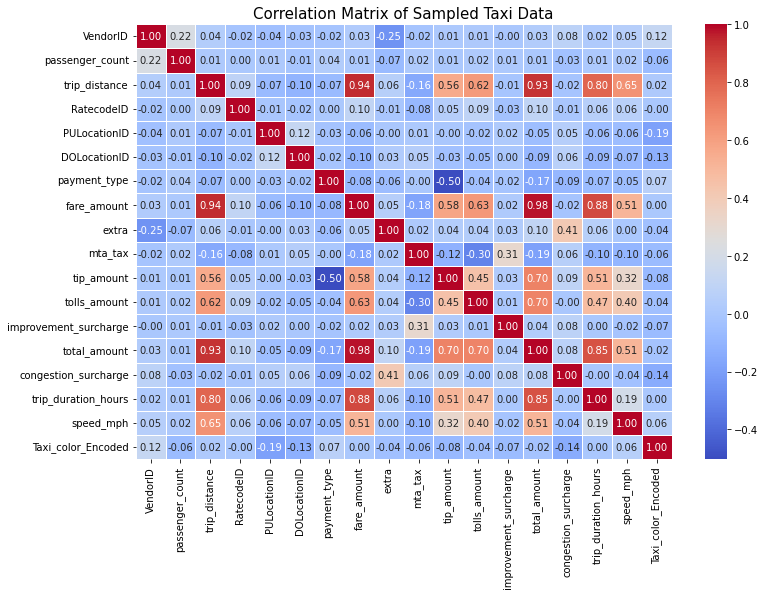

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with a color map and annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Sampled Taxi Data', fontsize=15)

# Show the plot
plt.show()


In [0]:
# Let's see the correlation clearly
(df.corr()["total_amount"] # transform it into data corr
      .sort_values(ascending=False) # sort the values
      .to_frame() # change it into data frame
      .T) # transpose

,total_amount,fare_amount,trip_distance,trip_duration_hours,tip_amount,tolls_amount,speed_mph,extra,RatecodeID,congestion_surcharge,improvement_surcharge,VendorID,passenger_count,Taxi_color_Encoded,PULocationID,DOLocationID,payment_type,mta_tax
total_amount,1.0,0.978457,0.927411,0.850508,0.703954,0.697241,0.509698,0.104159,0.101016,0.076138,0.035163,0.034183,0.007468,-0.024547,-0.051362,-0.090386,-0.17134,-0.188546


In [0]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter training data (exclude October, November, December 2022)
train_data = df[
    ~((df['tpep_pickup_datetime'].dt.year == 2022) & 
      (df['tpep_pickup_datetime'].dt.month.isin([10, 11, 12])))
]

In [0]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
train_df = sampdf.filter(~(col('tpep_pickup_datetime').between('2022-10-01', '2022-12-31')))



In [0]:
# Filter the data for October, November, and December 2022
test_df = combined_taxi_df.filter(col('tpep_pickup_datetime').between('2022-10-01', '2022-12-31'))


In [0]:

# Count the number of rows in the test dataset
print(f"Testing sample size: {test_df.count()}")

Testing sample size: 10170193


In [0]:
# Calculate the fraction of data to sample 5000 rows
fraction = 5000 / test_df.count()

# Sample 5000 rows randomly from test_df
test_df = test_df.sample(withReplacement=False, fraction=fraction, seed=42)



In [0]:
# Show counts for training and testing samples
print(f"Training sample size: {train_df.count()}")
print(f"Sampled test size: {test_df.count()}")

Training sample size: 9855
Sampled test size: 4960


In [0]:
test_df=test_df.toPandas()

In [0]:
feature_columns = [	"trip_distance",	"trip_duration_hours"	, "tip_amount"	,	"speed_mph"	, "RatecodeID", 	"extra", 	"improvement_surcharge","VendorID",	"passenger_count"	]

# Assemble the features into a feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform both train and test sets to include the feature vector
train_dff = assembler.transform(train_df).select('features', 'total_amount')
test_dff = assembler.transform(test_df).select('features', 'total_amount')


In [0]:
# Linear Regression
lr = LinearRegression(labelCol='total_amount', featuresCol='features')
lr_model = lr.fit(train_dff)

# Make predictions on the test set
lr_predictions = lr_model.transform(test_dff)

In [0]:
# Random Forest Regression
rf = RandomForestRegressor(labelCol='total_amount', featuresCol='features')
rf_model = rf.fit(train_dff)

# Make predictions on the test set
rf_predictions = rf_model.transform(test_dff)

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the evaluator for RMSE
evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")

# Calculate RMSE on the test data
rf_rmse = evaluator.evaluate(rf_predictions)

print(f"Random Forest Regression RMSE: {rf_rmse}")


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-712182544903354>:7
      4 evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
      6 # Calculate RMSE on the test data
----> 7 rf_rmse = evaluator.evaluate(rf_predictions)
      9 print(f"Random Forest Regression RMSE: {rf_rmse}")

File /databricks/spark/python/pyspark/ml/evaluation.py:111, in Evaluator.evaluate(self, dataset, params)
    109         return self.copy(params)._evaluate(dataset)
    110     else:
--> 111         return self._evaluate(dataset)
    112 else:
    113     raise TypeError("Params must be a param map but got %s." % type(params))

File /databricks/spark/python/pyspark/ml/evaluation.py:148, in JavaEvaluator._evaluate(self, dataset)
    146 self._transfer_params_to_java()
    147 assert self._java_obj is not None
--> 148 return self._java_obj.eval

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the evaluator for RMSE
evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")

# Calculate RMSE on the test data for Linear Regression
lr_rmse = evaluator.evaluate(lr_predictions)

print(f"Linear Regression RMSE: {lr_rmse}")


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-712182544903355>:7
      4 evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
      6 # Calculate RMSE on the test data for Linear Regression
----> 7 lr_rmse = evaluator.evaluate(lr_predictions)
      9 print(f"Linear Regression RMSE: {lr_rmse}")

File /databricks/spark/python/pyspark/ml/evaluation.py:111, in Evaluator.evaluate(self, dataset, params)
    109         return self.copy(params)._evaluate(dataset)
    110     else:
--> 111         return self._evaluate(dataset)
    112 else:
    113     raise TypeError("Params must be a param map but got %s." % type(params))

File /databricks/spark/python/pyspark/ml/evaluation.py:148, in JavaEvaluator._evaluate(self, dataset)
    146 self._transfer_params_to_java()
    147 assert self._java_obj is not None
--> 148 return self

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
# Columns to use (excluding 'fare_amount' and 'tolls_amount')
features = ['trip_distance', 'trip_duration_hours', 'tip_amount', 'speed_mph', 'extra', 
            'RatecodeID', 'congestion_surcharge', 'improvement_surcharge', 'VendorID', 'passenger_count']

# Target variable
target = 'total_amount'


In [0]:
# Fill NaN values in training and testing datasets with the mean (for numerical features)
train_data[features] = train_data[features].fillna(train_data[features].mean())
test_df[features] = test_df[features].fillna(test_df[features].mean())


<command-24764372614235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[features] = train_data[features].fillna(train_data[features].mean())


In [0]:
# Split train and test data into features (X) and target (y)
X_train = train_data[features]
y_train = train_data[target]

X_test = test_df[features]
y_test = test_df[target]


In [0]:
### Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

# Calculate RMSE for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print(f"Linear Regression RMSE: {rmse_linear}")

Linear Regression RMSE: 5.859474220741091


In [0]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate RMSE for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Regression RMSE: {rmse_rf}")

Random Forest Regression RMSE: 5.638002509304943
